# Up states: Stability of SynapticScaling learning rule

Soldado-Magraner, Motanis, Laje & Buonomano (2021)  
Author: Rodrigo Laje

(With constant input current $I_{ext}$ in order to have a non-paradoxical fixed point.)

## Neural subsystem

Load script, prevent output:

In [1]:
%%capture
load('up states - Neural subsystem stability - with Iext.sage.py')

## Synaptic subsystem: SynapticScaling

#### SynapticScaling equations

In [2]:
var('dWEEdt,dWEIdt,dWIEdt,dWIIdt')
var('alpha_EE,alpha_EI,alpha_IE,alpha_II')
f_WEE = dWEEdt == alpha_EE*W_EE*(E_set-E)
f_WEI = dWEIdt == -alpha_EI*W_EI*(E_set-E)
f_WIE = dWIEdt == alpha_IE*W_IE*(I_set-I)
f_WII = dWIIdt == -alpha_II*W_II*(I_set-I)
show(f_WEE)
show(f_WEI)
show(f_WIE)
show(f_WII)

dWEEdt == -(E - E_set)*W_EE*alpha_EE

dWEIdt == (E - E_set)*W_EI*alpha_EI

dWIEdt == -(I - I_set)*W_IE*alpha_IE

dWIIdt == (I - I_set)*W_II*alpha_II

In [3]:
synapticFixedPoint = solve([f_WEE.subs(dWEEdt==0),f_WEI.subs(dWEIdt==0),f_WIE.subs(dWIEdt==0),f_WII.subs(dWIIdt==0)],E,I)
synapticFixedPoint_up = synapticFixedPoint[0]

Only one solution compatible with suprathreshold activity:

#### Fixed point (Up state):  
$E=E_{set}$, $I=I_{set}$ (the weights can take any value subject to $E_{ss}=E_{set}$ and $I_{ss}=I_{set}$)

In [4]:
show(synapticFixedPoint_up)

[E == E_set, I == I_set]

## Quasi-steady-state approximation
1. Full system neural+synaptic
2. Nondimensionalization
3. Normalization
4. Approximation (fast neural subsystem)

### Full system

In [5]:
show(f_E)
show(f_I)
show(f_WEE)
show(f_WEI)
show(f_WIE)
show(f_WII)

dEdt == ((E*W_EE - I*W_EI + I_ext - Theta_E)*g_E - E)/tau_E

dIdt == ((E*W_IE - I*W_II - Theta_I)*g_I - I)/tau_I

dWEEdt == -(E - E_set)*W_EE*alpha_EE

dWEIdt == (E - E_set)*W_EI*alpha_EI

dWIEdt == -(I - I_set)*W_IE*alpha_IE

dWIIdt == (I - I_set)*W_II*alpha_II

### Nondimensionalization

#### Definition of nondimensional variables  
Define new (nondimensional) variables $e$, $i$, etc. and scaling parameters $E_0$, $I_0$, etc:  
$e = E/E_0$  
$i = I/I_0$  
$\tau = t/\tau_0$  
$w_{EE} = W_{EE}/W_{EE0}$  
... etc

In [6]:
var('e,i')
var('E_0,I_0,tau_0')
var('w_EE,w_EI,w_IE,w_II')
var('W_EE0,W_EI0,W_IE0,W_II0')
var('dedtau,didtau')
var('dwEEdtau,dwEIdtau,dwIEdtau,dwIIdtau');

Replacement rules:

In [7]:
nondim = [E==E_0*e,dEdt==(E_0/tau_0)*dedtau,I==I_0*i,dIdt==(I_0/tau_0)*didtau,W_EE==W_EE0*w_EE,W_EI==W_EI0*w_EI,W_IE==W_IE0*w_IE,W_II==W_II0*w_II,dWEEdt==(W_EE0/tau_0)*dwEEdtau,dWEIdt==(W_EI0/tau_0)*dwEIdtau,dWIEdt==(W_IE0/tau_0)*dwIEdtau,dWIIdt==(W_II0/tau_0)*dwIIdtau]
show(nondim)

[E == E_0*e,
 dEdt == E_0*dedtau/tau_0,
 I == I_0*i,
 dIdt == I_0*didtau/tau_0,
 W_EE == W_EE0*w_EE,
 W_EI == W_EI0*w_EI,
 W_IE == W_IE0*w_IE,
 W_II == W_II0*w_II,
 dWEEdt == W_EE0*dwEEdtau/tau_0,
 dWEIdt == W_EI0*dwEIdtau/tau_0,
 dWIEdt == W_IE0*dwIEdtau/tau_0,
 dWIIdt == W_II0*dwIIdtau/tau_0]

Full system after replacement:

In [8]:
f_e = f_E.subs(nondim)*tau_E/E_0
f_i = f_I.subs(nondim)*tau_I/I_0
f_wEE = f_WEE.subs(nondim)*tau_0/W_EE0
f_wEI = f_WEI.subs(nondim)*tau_0/W_EI0
f_wIE = f_WIE.subs(nondim)*tau_0/W_IE0
f_wII = f_WII.subs(nondim)*tau_0/W_II0
show(f_e.expand())
show(f_i.expand())
show(f_wEE.expand())
show(f_wEI.expand())
show(f_wIE.expand())
show(f_wII.expand())

dedtau*tau_E/tau_0 == W_EE0*e*g_E*w_EE - I_0*W_EI0*g_E*i*w_EI/E_0 - e + I_ext*g_E/E_0 - Theta_E*g_E/E_0

didtau*tau_I/tau_0 == E_0*W_IE0*e*g_I*w_IE/I_0 - W_II0*g_I*i*w_II - Theta_I*g_I/I_0 - i

dwEEdtau == -E_0*alpha_EE*e*tau_0*w_EE + E_set*alpha_EE*tau_0*w_EE

dwEIdtau == E_0*alpha_EI*e*tau_0*w_EI - E_set*alpha_EI*tau_0*w_EI

dwIEdtau == -I_0*alpha_IE*i*tau_0*w_IE + I_set*alpha_IE*tau_0*w_IE

dwIIdtau == I_0*alpha_II*i*tau_0*w_II - I_set*alpha_II*tau_0*w_II

### Normalization of equations  
Choose scaling parameters such that nondimensional variables are of order 1:  
$\tau_0 = 1/(\alpha_{EE} E_{set})$  
$E_0 = E_{set}$  
$I_0 = I_{set}$  
$W_{EE0} = 1/g_E$  
$W_{II0} = R/g_E$  
$W_{EI0} = 1/(R g_I)$  
$W_{IE0} = 1/g_I$  

Define new parameters:  
$\epsilon_E = \tau_E/\tau_0$  
$\epsilon_I = \tau_I/\tau_0$  
$\alpha_2 = \alpha_{EI}/\alpha_{EE}$  
$\alpha_3 = \alpha_{IE}/\alpha_{EE}$  
$\alpha_4 = \alpha_{II}/\alpha_{EE}$  
$R = E_{set}/I_{set}$  
$g = g_E/g_I$  
$\theta_E = (g_E/E_{set}) Thr_E$  
$\theta_I = (g_I/I_{set}) Thr_I$  
$i_{ext} = (g_E/E_{set})I_{ext}$

In [10]:
var('epsilon_E,epsilon_I')
var('theta_E,theta_I,R,g,alpha_2,alpha_3,alpha_4,i_ext')
normaliz = [tau_0==1/(alpha_EE*E_set),tau_E==epsilon_E*tau_0,tau_I==epsilon_I*tau_0,E_0==E_set,I_0==I_set,W_EE0==1/g_E,W_EI0==R/g_E,W_IE0==1/(R*g_I),W_II0==1/g_I,I_set==E_set/R,Theta_E==theta_E*E_set/g_E,Theta_I==theta_I*I_set/g_I,g_E==g*g_I,alpha_EI==alpha_2*alpha_EE,alpha_IE==alpha_3*alpha_EE,alpha_II==alpha_4*alpha_EE,I_ext==(E_set/g_E)*i_ext]
show(normaliz)

[tau_0 == 1/(E_set*alpha_EE),
 tau_E == epsilon_E*tau_0,
 tau_I == epsilon_I*tau_0,
 E_0 == E_set,
 I_0 == I_set,
 W_EE0 == (1/g_E),
 W_EI0 == R/g_E,
 W_IE0 == 1/(R*g_I),
 W_II0 == (1/g_I),
 I_set == E_set/R,
 Theta_E == E_set*theta_E/g_E,
 Theta_I == I_set*theta_I/g_I,
 g_E == g*g_I,
 alpha_EI == alpha_2*alpha_EE,
 alpha_IE == alpha_3*alpha_EE,
 alpha_II == alpha_4*alpha_EE,
 I_ext == E_set*i_ext/g_E]

Replacement rules: numerical values, parameter definitions, nondimensionalized weights

In [11]:
parameters = [epsilon_E==tau_E/tau_0,epsilon_I==tau_I/tau_0,g==g_E/g_I,R==E_set/I_set,theta_E==(g_E/E_set)*Theta_E,theta_I==(g_I/I_set)*Theta_I,W_EE0==1/g_E,W_EI0==R/g_E,W_IE0==1/(R*g_I),W_II0==1/g_I,alpha_2==alpha_EI/alpha_EE,alpha_3==alpha_IE/alpha_EE,alpha_4==alpha_II/alpha_EE,i_ext==(g_E/E_set)*I_ext]
weights = [w_EE==W_EE/W_EE0,w_IE==W_IE/W_IE0,w_EI==W_EI/W_EI0,w_II==W_II/W_II0]

#### Nondimensionalized, normalized equations

In [12]:
f_e_norm = f_e.subs(normaliz).subs(normaliz).subs(normaliz).expand()
f_i_norm = f_i.subs(normaliz).subs(normaliz).subs(normaliz).expand()
f_wEE_norm = f_wEE.subs(normaliz).subs(normaliz).subs(normaliz).expand().factor()
f_wEI_norm = f_wEI.subs(normaliz).subs(normaliz).expand().factor()
f_wIE_norm = f_wIE.subs(normaliz).subs(normaliz).expand().factor()
f_wII_norm = f_wII.subs(normaliz).subs(normaliz).subs(normaliz).expand().factor()
show(f_e_norm)
show(f_i_norm)
show(f_wEE_norm)
show(f_wEI_norm)
show(f_wIE_norm)
show(f_wII_norm)

dedtau*epsilon_E == e*w_EE - i*w_EI - e + i_ext - theta_E

didtau*epsilon_I == e*w_IE - i*w_II - i - theta_I

dwEEdtau == -(e - 1)*w_EE

dwEIdtau == alpha_2*(e - 1)*w_EI

dwIEdtau == -alpha_3*(i - 1)*w_IE/R

dwIIdtau == alpha_4*(i - 1)*w_II/R

### Approximation: Quasi-steady-state solutions for the neural subsystem

Neural dynamics is much faster than synaptic dynamics, thus we assume E and I are in "equilibrium" (~instantaneous convergence to quasi-steady-state values, as if the weights were fixed) while the synaptic weights evolve according to their slow dynamics.  
That is, we consider  
$\tau_E \ll \tau_0$ and $\tau_I \ll \tau_0$  
thus  
$\epsilon_E \ll 1$ and $\epsilon_E \ll 1$  
thus  
$\epsilon_E\frac{de}{d\tau} \sim 0$ and $\epsilon_I\frac{di}{d\tau} \sim 0$:

In [13]:
neuralFixedPoint_nondim = solve([f_e_norm.subs(dedtau==0),f_i_norm.subs(didtau==0)],e,i)
e_ss = neuralFixedPoint_nondim[0][0]
i_ss = neuralFixedPoint_nondim[0][1]
show(e_ss)
show(i_ss)

e == (theta_I*w_EI + i_ext*(w_II + 1) - theta_E*(w_II + 1))/(w_EI*w_IE - w_EE*(w_II + 1) + w_II + 1)

i == (theta_I*w_EE + i_ext*w_IE - theta_E*w_IE - theta_I)/(w_EI*w_IE - w_EE*(w_II + 1) + w_II + 1)

## Stability of the Up state

### Jacobian of the nondimensionalized synaptic dynamics in the QSS approximation

If $\frac{dw_{EE}}{d\tau} = f_1(w_{EE},w_{EI}...)$, ...  
then the Jacobian matrix is
$J_{qss} = \begin{pmatrix}
\frac{\partial f_1}{\partial w_{EE}} & \frac{\partial f_1}{\partial w_{EI}} & ... \\
... & ... & ...
\end{pmatrix}
$  
Stability analysis: we should evaluate $J_{qss}$ at the QSS fixed point and compute its eigenvalues. If at least one eigenvalue has positive real part, then the fixed point is unstable.

### Jacobian matrix

The Jacobian matrix $J$ is the matrix of all the first-order partial derivatives of the learning rule with respect to the weights. In terms of the QSS synaptic system:  
$\displaystyle \frac{dw_{EE}}{d \tau} = f_1(w_{EE},w_{EI},\ldots)$  
$\displaystyle \frac{dw_{EI}}{d \tau} = f_2(w_{EE},w_{EI},\ldots)$  ... etc  

then  
\begin{array}{lll}
J_{11} = \displaystyle \frac{\partial f_1}{\partial w_{EE}} & J_{12} = \displaystyle \frac{\partial f_1}{\partial w_{EI}} & \ldots \\
J_{21} = \displaystyle \frac{\partial f_2}{\partial w_{EE}} & J_{22} = \displaystyle \frac{\partial f_2}{\partial w_{EI}} & \ldots \\
\vdots & \vdots &
\end{array}  

Instead of substituting $e = e_{ss}(w_{EE},w_{EI},w_{IE},w_{II})$ and $i = i_{ss}(w_{EE},w_{EI},w_{IE},w_{II})$ directly into $f_1(e,i), \ldots$ and then differentiating, we will use the chain rule:

#### Actual computation using the chain rule

The learning rule is expressed as a composition of functions $e$ and $i$ of the weights:  
$\displaystyle \frac{dw_{EE}}{d \tau} = f_1(e,i)$  
$\displaystyle \frac{dw_{EI}}{d \tau} = f_2(e,i)$ ... etc  

Using the chain rule, the Jacobian matrix elements can be computed as  
$J_{11} = \displaystyle \frac{\partial f_1}{\partial w_{EE}} = \frac{\partial f_1}{\partial e} \frac{\partial e}{\partial w_{EE}} + \frac{\partial f_1}{\partial i} \frac{\partial i}{\partial w_{EE}}$  
$J_{12} = \displaystyle \frac{\partial f_1}{\partial w_{EI}} = \frac{\partial f_1}{\partial e} \frac{\partial e}{\partial w_{EI}} + \frac{\partial f_1}{\partial i} \frac{\partial i}{\partial w_{EI}}$  
$J_{21} = \displaystyle \frac{\partial f_2}{\partial w_{EE}} = \frac{\partial f_2}{\partial e} \frac{\partial e}{\partial w_{EE}} + \frac{\partial f_2}{\partial i} \frac{\partial i}{\partial w_{EE}}$  
$J_{22} = \displaystyle \frac{\partial f_2}{\partial w_{EI}} = \frac{\partial f_2}{\partial e} \frac{\partial e}{\partial w_{EI}} + \frac{\partial f_2}{\partial i} \frac{\partial i}{\partial w_{EI}}$

If the learning rule includes explicit dependence on the weights (as in this case) we need a more general expression:  
$\frac{dw_{EE}}{d \tau} = f_1(e,i,w_{EE},w_{EI},\ldots)$  
$\frac{dw_{EI}}{d \tau} = f_2(e,i,w_{EE},w_{EI},\ldots)$ ... etc  

first substitute  
$w_{EE} \rightarrow p_{EE}$  
$w_{EI} \rightarrow p_{EI}, \ldots$  

to get  
$\displaystyle \frac{dw_{EE}}{d \tau} = f_1(e,i,p_{EE},p_{EI},\ldots)$  
$\displaystyle \frac{dw_{EI}}{d \tau} = f_2(e,i,p_{EE},p_{EI},\ldots)$  

and then take the partial derivatives:  
$J_{11} = \displaystyle \frac{\partial f_1}{\partial w_{EE}} = \frac{\partial f_1}{\partial e} \frac{\partial e}{\partial w_{EE}} + \frac{\partial f_1}{\partial i} \frac{\partial i}{\partial w_{EE}} + \frac{\partial f_1}{\partial p_{EE}}$ (because $\frac{\partial p_{EE}}{\partial w_{EE}}=1$ and $\frac{\partial p_{EI}}{\partial w_{EE}}=0 \ldots$)  
$J_{12} = \displaystyle \frac{\partial f_1}{\partial w_{EI}} = \frac{\partial f_1}{\partial e} \frac{\partial e}{\partial w_{EI}} + \frac{\partial f_1}{\partial i} \frac{\partial i}{\partial w_{EI}} + \frac{\partial f_1}{\partial p_{EI}}$ (because $\frac{\partial p_{EE}}{\partial w_{EI}}=0$ and $\frac{\partial p_{EI}}{\partial w_{EI}}=1 \ldots$)  
...etc

In [14]:
var('dedwEE_ph,didwEE_ph') #placeholders
var('dedwEI_ph,didwEI_ph')
var('dedwIE_ph,didwIE_ph')
var('dedwII_ph,didwII_ph')
J_11 = diff(dwEEdtau.subs(f_wEE_norm),e)*dedwEE_ph + diff(dwEEdtau.subs(f_wEE_norm),i)*didwEE_ph + diff(dwEEdtau.subs(f_wEE_norm),w_EE)
J_12 = diff(dwEEdtau.subs(f_wEE_norm),e)*dedwEI_ph + diff(dwEEdtau.subs(f_wEE_norm),i)*didwEI_ph + diff(dwEEdtau.subs(f_wEE_norm),w_EI)
J_13 = diff(dwEEdtau.subs(f_wEE_norm),e)*dedwIE_ph + diff(dwEEdtau.subs(f_wEE_norm),i)*didwIE_ph + diff(dwEEdtau.subs(f_wEE_norm),w_IE)
J_14 = diff(dwEEdtau.subs(f_wEE_norm),e)*dedwII_ph + diff(dwEEdtau.subs(f_wEE_norm),i)*didwII_ph + diff(dwEEdtau.subs(f_wEE_norm),w_II)
J_21 = diff(dwEIdtau.subs(f_wEI_norm),e)*dedwEE_ph + diff(dwEIdtau.subs(f_wEI_norm),i)*didwEE_ph + diff(dwEIdtau.subs(f_wEI_norm),w_EE)
J_22 = diff(dwEIdtau.subs(f_wEI_norm),e)*dedwEI_ph + diff(dwEIdtau.subs(f_wEI_norm),i)*didwEI_ph + diff(dwEIdtau.subs(f_wEI_norm),w_EI)
J_23 = diff(dwEIdtau.subs(f_wEI_norm),e)*dedwIE_ph + diff(dwEIdtau.subs(f_wEI_norm),i)*didwIE_ph + diff(dwEIdtau.subs(f_wEI_norm),w_IE)
J_24 = diff(dwEIdtau.subs(f_wEI_norm),e)*dedwII_ph + diff(dwEIdtau.subs(f_wEI_norm),i)*didwII_ph + diff(dwEIdtau.subs(f_wEI_norm),w_II)
J_31 = diff(dwIEdtau.subs(f_wIE_norm),e)*dedwEE_ph + diff(dwIEdtau.subs(f_wIE_norm),i)*didwEE_ph + diff(dwIEdtau.subs(f_wIE_norm),w_EE)
J_32 = diff(dwIEdtau.subs(f_wIE_norm),e)*dedwEI_ph + diff(dwIEdtau.subs(f_wIE_norm),i)*didwEI_ph + diff(dwIEdtau.subs(f_wIE_norm),w_EI)
J_33 = diff(dwIEdtau.subs(f_wIE_norm),e)*dedwIE_ph + diff(dwIEdtau.subs(f_wIE_norm),i)*didwIE_ph + diff(dwIEdtau.subs(f_wIE_norm),w_IE)
J_34 = diff(dwIEdtau.subs(f_wIE_norm),e)*dedwII_ph + diff(dwIEdtau.subs(f_wIE_norm),i)*didwII_ph + diff(dwIEdtau.subs(f_wIE_norm),w_II)
J_41 = diff(dwIIdtau.subs(f_wII_norm),e)*dedwEE_ph + diff(dwIIdtau.subs(f_wII_norm),i)*didwEE_ph + diff(dwIIdtau.subs(f_wII_norm),w_EE)
J_42 = diff(dwIIdtau.subs(f_wII_norm),e)*dedwEI_ph + diff(dwIIdtau.subs(f_wII_norm),i)*didwEI_ph + diff(dwIIdtau.subs(f_wII_norm),w_EI)
J_43 = diff(dwIIdtau.subs(f_wII_norm),e)*dedwIE_ph + diff(dwIIdtau.subs(f_wII_norm),i)*didwIE_ph + diff(dwIIdtau.subs(f_wII_norm),w_IE)
J_44 = diff(dwIIdtau.subs(f_wII_norm),e)*dedwII_ph + diff(dwIIdtau.subs(f_wII_norm),i)*didwII_ph + diff(dwIIdtau.subs(f_wII_norm),w_II)
J = matrix([[J_11,J_12,J_13,J_14],[J_21,J_22,J_23,J_24],[J_31,J_32,J_33,J_34],[J_41,J_42,J_43,J_44]])
show(J)

[                      -dedwEE_ph*w_EE - e + 1                               -dedwEI_ph*w_EE                               -dedwIE_ph*w_EE                               -dedwII_ph*w_EE]
[                       alpha_2*dedwEE_ph*w_EI      alpha_2*dedwEI_ph*w_EI + alpha_2*(e - 1)                        alpha_2*dedwIE_ph*w_EI                        alpha_2*dedwII_ph*w_EI]
[                    -alpha_3*didwEE_ph*w_IE/R                     -alpha_3*didwEI_ph*w_IE/R -alpha_3*didwIE_ph*w_IE/R - alpha_3*(i - 1)/R                     -alpha_3*didwII_ph*w_IE/R]
[                     alpha_4*didwEE_ph*w_II/R                      alpha_4*didwEI_ph*w_II/R                      alpha_4*didwIE_ph*w_II/R  alpha_4*didwII_ph*w_II/R + alpha_4*(i - 1)/R]

In order to compute the eigenvalues of the Jacobian matrix we need:  
- the (quasi)steady-state values $e=e_{ss}(w_{EE},w_{EI},\ldots)$ and $i=i_{ss}(w_{EE},w_{EI},\ldots)$  
- the partial derivatives $\displaystyle \frac{de}{dw_{EE}} \ldots$  
- the fixed point values $w_{EEup}, w_{EIup},\ldots$

#### Quasi-steady-state values of $e$ and $i$

In [15]:
show(e_ss)
show(i_ss)

e == (theta_I*w_EI + i_ext*(w_II + 1) - theta_E*(w_II + 1))/(w_EI*w_IE - w_EE*(w_II + 1) + w_II + 1)

i == (theta_I*w_EE + i_ext*w_IE - theta_E*w_IE - theta_I)/(w_EI*w_IE - w_EE*(w_II + 1) + w_II + 1)

#### Partial derivatives

In [16]:
dedwEE = diff(e.subs(e_ss),w_EE).factor()
dedwEI = diff(e.subs(e_ss),w_EI).factor()
dedwIE = diff(e.subs(e_ss),w_IE).factor()
dedwII = diff(e.subs(e_ss),w_II).factor()
didwEE = diff(i.subs(i_ss),w_EE).factor()
didwEI = diff(i.subs(i_ss),w_EI).factor()
didwIE = diff(i.subs(i_ss),w_IE).factor()
didwII = diff(i.subs(i_ss),w_II).factor()
dxdw = [dedwEE_ph==dedwEE,dedwEI_ph==dedwEI,dedwIE_ph==dedwIE,dedwII_ph==dedwII,didwEE_ph==didwEE,didwEI_ph==didwEI,didwIE_ph==didwIE,didwII_ph==didwII]

#### Fixed points

Fixed points are defined by $\frac{d w_{EE}}{d\tau}=0$, etc.  
1. Fixed points without substitution: (i.e. in terms of $e$ and $i$)

In [17]:
synapticFixedPoint_qss_nosubs = solve([f_wEE_norm.subs(dwEEdtau==0),f_wEI_norm.subs(dwEIdtau==0),f_wIE_norm.subs(dwIEdtau==0),f_wII_norm.subs(dwIIdtau==0)],e,i)
synapticFixedPoint_qss_nosubs_up = synapticFixedPoint_qss_nosubs[0]
show(synapticFixedPoint_qss_nosubs_up)

[e == 1, i == 1]

2. Fixed points with substitution (i.e. explicit values of the weights).  
Solve for the weight values at the Up state:

In [18]:
synapticFixedPoint_qss_subs = solve([e_ss.subs(e==1),i_ss.subs(i==1)],w_EI,w_II)
synapticFixedPoint_qss_subs_up = synapticFixedPoint_qss_subs[0]
show(synapticFixedPoint_qss_subs_up)

[w_EI == i_ext - theta_E + w_EE - 1, w_II == -theta_I + w_IE - 1]

Interpretation of the above expressions: the weights converge to a plane attractor (a 2D plane in 4D phase space space---two weights are free and the other two are linear functions of the first two), so potentially many different combinations of weight values are a solution.  

Confirm obtained solution:

In [19]:
show(e_ss.subs(synapticFixedPoint_qss_subs_up).full_simplify())
show(i_ss.subs(synapticFixedPoint_qss_subs_up).full_simplify())

e == 1

i == 1

Fixed-point values of the original weights at the Up state:

In [20]:
synapticFixedPoint_qss_subs_up_orig = [W_EIup,W_IIup]
show(synapticFixedPoint_qss_subs_up_orig)

[W_EI == ((E_set*W_EE + I_ext - Theta_E)*g_E - E_set)/(I_set*g_E),
 W_II == ((E_set*W_IE - Theta_I)*g_I - I_set)/(I_set*g_I)]

### Evaluation of the Jacobian matrix at the Up state fixed point

The Jacobian matrix evaluated at the Up state:

In [21]:
J_up = J.subs(synapticFixedPoint_qss_nosubs_up).subs(dxdw).subs(synapticFixedPoint_qss_subs_up).simplify()
show(J_up)

[                               -(i_ext*(theta_I - w_IE + 1) - theta_E*(theta_I - w_IE + 1) - (i_ext - theta_E + w_EE - 1)*theta_I - i_ext + theta_E)*(theta_I - w_IE)*w_EE/((theta_I - w_IE + 1)*w_EE + (i_ext - theta_E + w_EE - 1)*w_IE - theta_I - w_EE + w_IE)^2                                                                                                -(theta_I*w_EE + i_ext*w_IE - theta_E*w_IE - theta_I)*(theta_I - w_IE)*w_EE/((theta_I - w_IE + 1)*w_EE + (i_ext - theta_E + w_EE - 1)*w_IE - theta_I - w_EE + w_IE)^2                    -(i_ext*(theta_I - w_IE + 1) - theta_E*(theta_I - w_IE + 1) - (i_ext - theta_E + w_EE - 1)*theta_I - i_ext + theta_E)*(i_ext - theta_E + w_EE - 1)*w_EE/((theta_I - w_IE + 1)*w_EE + (i_ext - theta_E + w_EE - 1)*w_IE - theta_I - w_EE + w_IE)^2                                                                                    -(theta_I*w_EE + i_ext*w_IE - theta_E*w_IE - theta_I)*(i_ext - theta_E + w_EE - 1)*w_EE/((theta_I - w_IE + 1)*w_EE + (i_ext - theta_E + w_EE - 1)*w_IE - theta_I - w_EE + w_IE)^2]
[(i_ext*(theta_I - w_IE + 1) - theta_E*(theta_I - w_IE + 1) - (i_ext - theta_E + w_EE - 1)*theta_I - i_ext + theta_E)*alpha_2*(i_ext - theta_E + w_EE - 1)*(theta_I - w_IE)/((theta_I - w_IE + 1)*w_EE + (i_ext - theta_E + w_EE - 1)*w_IE - theta_I - w_EE + w_IE)^2                                                                 (theta_I*w_EE + i_ext*w_IE - theta_E*w_IE - theta_I)*alpha_2*(i_ext - theta_E + w_EE - 1)*(theta_I - w_IE)/((theta_I - w_IE + 1)*w_EE + (i_ext - theta_E + w_EE - 1)*w_IE - theta_I - w_EE + w_IE)^2                (i_ext*(theta_I - w_IE + 1) - theta_E*(theta_I - w_IE + 1) - (i_ext - theta_E + w_EE - 1)*theta_I - i_ext + theta_E)*alpha_2*(i_ext - theta_E + w_EE - 1)^2/((theta_I - w_IE + 1)*w_EE + (i_ext - theta_E + w_EE - 1)*w_IE - theta_I - w_EE + w_IE)^2                                                                                (theta_I*w_EE + i_ext*w_IE - theta_E*w_IE - theta_I)*alpha_2*(i_ext - theta_E + w_EE - 1)^2/((theta_I - w_IE + 1)*w_EE + (i_ext - theta_E + w_EE - 1)*w_IE - theta_I - w_EE + w_IE)^2]
[                                   (i_ext*(theta_I - w_IE + 1) - theta_E*(theta_I - w_IE + 1) - (i_ext - theta_E + w_EE - 1)*theta_I - i_ext + theta_E)*alpha_3*w_IE^2/(((theta_I - w_IE + 1)*w_EE + (i_ext - theta_E + w_EE - 1)*w_IE - theta_I - w_EE + w_IE)^2*R)                                                                                                    (theta_I*w_EE + i_ext*w_IE - theta_E*w_IE - theta_I)*alpha_3*w_IE^2/(((theta_I - w_IE + 1)*w_EE + (i_ext - theta_E + w_EE - 1)*w_IE - theta_I - w_EE + w_IE)^2*R)                          -(i_ext*(theta_I - w_IE + 1) - theta_E*(theta_I - w_IE + 1) - (i_ext - theta_E + w_EE - 1)*theta_I - i_ext + theta_E)*alpha_3*(w_EE - 1)*w_IE/(((theta_I - w_IE + 1)*w_EE + (i_ext - theta_E + w_EE - 1)*w_IE - theta_I - w_EE + w_IE)^2*R)                                                                                          -(theta_I*w_EE + i_ext*w_IE - theta_E*w_IE - theta_I)*alpha_3*(w_EE - 1)*w_IE/(((theta_I - w_IE + 1)*w_EE + (i_ext - theta_E + w_EE - 1)*w_IE - theta_I - w_EE + w_IE)^2*R)]
[                (i_ext*(theta_I - w_IE + 1) - theta_E*(theta_I - w_IE + 1) - (i_ext - theta_E + w_EE - 1)*theta_I - i_ext + theta_E)*alpha_4*(theta_I - w_IE + 1)*w_IE/(((theta_I - w_IE + 1)*w_EE + (i_ext - theta_E + w_EE - 1)*w_IE - theta_I - w_EE + w_IE)^2*R)                                                                                 (theta_I*w_EE + i_ext*w_IE - theta_E*w_IE - theta_I)*alpha_4*(theta_I - w_IE + 1)*w_IE/(((theta_I - w_IE + 1)*w_EE + (i_ext - theta_E + w_EE - 1)*w_IE - theta_I - w_EE + w_IE)^2*R)          -(i_ext*(theta_I - w_IE + 1) - theta_E*(theta_I - w_IE + 1) - (i_ext - theta_E + w_EE - 1)*theta_I - i_ext + theta_E)*alpha_4*(theta_I - w_IE + 1)*(w_EE - 1)/(((theta_I - w_IE + 1)*w_EE + (i_ext - theta_E + w_EE - 1)*w_IE - theta_I - w_EE + w_IE)^2*R)                                                                          -(the

The Jacobian matrix at the first solution has two dependent rows, then two of the eigenvalues will be zero:

In [22]:
J_up.eigenvalues()

[1/2*((R*alpha_2*i_ext - R*alpha_2*theta_E - R*alpha_2 + alpha_4)*theta_I + ((R*alpha_2 + R - alpha_4)*theta_I - alpha_4)*w_EE - (R*alpha_2*i_ext - R*alpha_2*theta_E - R*alpha_2 + (R*alpha_2 + R - alpha_3 - alpha_4)*w_EE + alpha_3 + alpha_4)*w_IE + alpha_4 - sqrt((R^2*alpha_2^2*i_ext^2 + R^2*alpha_2^2*theta_E^2 + R^2*alpha_2^2 + 2*R*alpha_2*alpha_4 + alpha_4^2 - 2*(R^2*alpha_2^2 + R*alpha_2*alpha_4)*i_ext - 2*(R^2*alpha_2^2*i_ext - R^2*alpha_2^2 - R*alpha_2*alpha_4)*theta_E)*theta_I^2 + ((R^2*alpha_2^2 + 2*R^2*alpha_2 + R^2 + 2*(R*alpha_2 + R)*alpha_4 + alpha_4^2)*theta_I^2 + alpha_4^2 + 2*((R*alpha_2 + R)*alpha_4 + alpha_4^2)*theta_I)*w_EE^2 + (R^2*alpha_2^2 - 2*R*alpha_2*alpha_3 + (R^2*alpha_2^2 - 4*R*alpha_2*alpha_3 - 4*R*alpha_2*alpha_4)*i_ext^2 + (R^2*alpha_2^2 - 4*R*alpha_2*alpha_3 - 4*R*alpha_2*alpha_4)*theta_E^2 + (R^2*alpha_2^2 + 2*R^2*alpha_2 + R^2 - 2*(R*alpha_2 + R)*alpha_3 + alpha_3^2 - 2*(R*alpha_2 + R - alpha_3)*alpha_4 + alpha_4^2)*w_EE^2 + alpha_3^2 - 2*(R*alpha_2 - al

Recall that the steady-state solutions of the learning rule form a 2D plane in 4D phase space, and thus two out of the four eigenvalues are expected to be zero (meaning there is no dynamics along the plane).  
If both nonzero eigenvalues have negative real part then the learning rule is stable; if any of them has positive real part, then the rule is unstable.

## Linear stability of the directions with nonzero eigenvalues

Take the nonzero eigenvalues and check whether any of them has positive real part:

In [23]:
J_up_eigvalues = J_up.eigenvalues()
J_up_eigvalues1_aux = J_up_eigvalues[0]
J_up_eigvalues2_aux = J_up_eigvalues[1]
show(J_up_eigvalues1_aux)
show(J_up_eigvalues2_aux)

1/2*((R*alpha_2*i_ext - R*alpha_2*theta_E - R*alpha_2 + alpha_4)*theta_I + ((R*alpha_2 + R - alpha_4)*theta_I - alpha_4)*w_EE - (R*alpha_2*i_ext - R*alpha_2*theta_E - R*alpha_2 + (R*alpha_2 + R - alpha_3 - alpha_4)*w_EE + alpha_3 + alpha_4)*w_IE + alpha_4 - sqrt((R^2*alpha_2^2*i_ext^2 + R^2*alpha_2^2*theta_E^2 + R^2*alpha_2^2 + 2*R*alpha_2*alpha_4 + alpha_4^2 - 2*(R^2*alpha_2^2 + R*alpha_2*alpha_4)*i_ext - 2*(R^2*alpha_2^2*i_ext - R^2*alpha_2^2 - R*alpha_2*alpha_4)*theta_E)*theta_I^2 + ((R^2*alpha_2^2 + 2*R^2*alpha_2 + R^2 + 2*(R*alpha_2 + R)*alpha_4 + alpha_4^2)*theta_I^2 + alpha_4^2 + 2*((R*alpha_2 + R)*alpha_4 + alpha_4^2)*theta_I)*w_EE^2 + (R^2*alpha_2^2 - 2*R*alpha_2*alpha_3 + (R^2*alpha_2^2 - 4*R*alpha_2*alpha_3 - 4*R*alpha_2*alpha_4)*i_ext^2 + (R^2*alpha_2^2 - 4*R*alpha_2*alpha_3 - 4*R*alpha_2*alpha_4)*theta_E^2 + (R^2*alpha_2^2 + 2*R^2*alpha_2 + R^2 - 2*(R*alpha_2 + R)*alpha_3 + alpha_3^2 - 2*(R*alpha_2 + R - alpha_3)*alpha_4 + alpha_4^2)*w_EE^2 + alpha_3^2 - 2*(R*alpha_2 - alpha_3)*alpha_4 + alpha_4^2 - 2*(R^2*alpha_2^2 - 3*R*alpha_2*alpha_3 - 3*R*alpha_2*alpha_4)*i_ext + 2*(R^2*alpha_2^2 - 3*R*alpha_2*alpha_3 - 3*R*alpha_2*alpha_4 - (R^2*alpha_2^2 - 4*R*alpha_2*alpha_3 - 4*R*alpha_2*alpha_4)*i_ext)*theta_E - 2*(R^2*alpha_2^2 + R^2*alpha_2 - (2*R*alpha_2 + R)*alpha_3 + alpha_3^2 - (2*R*alpha_2 + R - 2*alpha_3)*alpha_4 + alpha_4^2 - (R^2*alpha_2^2 + R^2*alpha_2 - (3*R*alpha_2 + 2*R)*alpha_3 - (3*R*alpha_2 + 2*R)*alpha_4)*i_ext + (R^2*alpha_2^2 + R^2*alpha_2 - (3*R*alpha_2 + 2*R)*alpha_3 - (3*R*alpha_2 + 2*R)*alpha_4)*theta_E)*w_EE)*w_IE^2 + alpha_4^2 - 2*(R*alpha_2*alpha_4*i_ext - R*alpha_2*alpha_4*theta_E - R*alpha_2*alpha_4 - alpha_4^2)*theta_I - 2*((R^2*alpha_2^2 + R^2*alpha_2 + (2*R*alpha_2 + R)*alpha_4 + alpha_4^2 - (R^2*alpha_2^2 + R^2*alpha_2 + R*alpha_2*alpha_4)*i_ext + (R^2*alpha_2^2 + R^2*alpha_2 + R*alpha_2*alpha_4)*theta_E)*theta_I^2 + alpha_4^2 - (R*alpha_2*alpha_4*i_ext - R*alpha_2*alpha_4*theta_E - (2*R*alpha_2 + R)*alpha_4 - 2*alpha_4^2)*theta_I)*w_EE + 2*(2*R*alpha_2*alpha_4*i_ext^2 + 2*R*alpha_2*alpha_4*theta_E^2 - 3*R*alpha_2*alpha_4*i_ext + ((R*alpha_2 + R - alpha_3)*alpha_4 - alpha_4^2 - (R^2*alpha_2^2 + 2*R^2*alpha_2 + R^2 + (R*alpha_2 + R)*alpha_3 + alpha_3*alpha_4 + alpha_4^2)*theta_I)*w_EE^2 + (R*alpha_2 - alpha_3)*alpha_4 - alpha_4^2 - (4*R*alpha_2*alpha_4*i_ext - 3*R*alpha_2*alpha_4)*theta_E - (R^2*alpha_2^2 + R*alpha_2*alpha_3 + (R^2*alpha_2^2 - 2*R*alpha_2*alpha_4)*i_ext^2 + (R^2*alpha_2^2 - 2*R*alpha_2*alpha_4)*theta_E^2 + alpha_3*alpha_4 + alpha_4^2 - (2*R^2*alpha_2^2 + R*alpha_2*alpha_3 - 2*R*alpha_2*alpha_4)*i_ext + (2*R^2*alpha_2^2 + R*alpha_2*alpha_3 - 2*R*alpha_2*alpha_4 - 2*(R^2*alpha_2^2 - 2*R*alpha_2*alpha_4)*i_ext)*theta_E)*theta_I + ((3*R*alpha_2 + 2*R)*alpha_4*i_ext - (3*R*alpha_2 + 2*R)*alpha_4*theta_E - (2*R*alpha_2 + R - 2*alpha_3)*alpha_4 + 2*alpha_4^2 + (2*R^2*alpha_2^2 + 2*R^2*alpha_2 + (2*R*alpha_2 + R)*alpha_3 + 2*alpha_3*alpha_4 + 2*alpha_4^2 - (2*R^2*alpha_2^2 + 2*R^2*alpha_2 + R*alpha_2*alpha_3 - 2*(R*alpha_2 + R)*alpha_4)*i_ext + (2*R^2*alpha_2^2 + 2*R^2*alpha_2 + R*alpha_2*alpha_3 - 2*(R*alpha_2 + R)*alpha_4)*theta_E)*theta_I)*w_EE)*w_IE))/(R*theta_I*w_EE - R*theta_I + (R*i_ext - R*theta_E)*w_IE)

1/2*((R*alpha_2*i_ext - R*alpha_2*theta_E - R*alpha_2 + alpha_4)*theta_I + ((R*alpha_2 + R - alpha_4)*theta_I - alpha_4)*w_EE - (R*alpha_2*i_ext - R*alpha_2*theta_E - R*alpha_2 + (R*alpha_2 + R - alpha_3 - alpha_4)*w_EE + alpha_3 + alpha_4)*w_IE + alpha_4 + sqrt((R^2*alpha_2^2*i_ext^2 + R^2*alpha_2^2*theta_E^2 + R^2*alpha_2^2 + 2*R*alpha_2*alpha_4 + alpha_4^2 - 2*(R^2*alpha_2^2 + R*alpha_2*alpha_4)*i_ext - 2*(R^2*alpha_2^2*i_ext - R^2*alpha_2^2 - R*alpha_2*alpha_4)*theta_E)*theta_I^2 + ((R^2*alpha_2^2 + 2*R^2*alpha_2 + R^2 + 2*(R*alpha_2 + R)*alpha_4 + alpha_4^2)*theta_I^2 + alpha_4^2 + 2*((R*alpha_2 + R)*alpha_4 + alpha_4^2)*theta_I)*w_EE^2 + (R^2*alpha_2^2 - 2*R*alpha_2*alpha_3 + (R^2*alpha_2^2 - 4*R*alpha_2*alpha_3 - 4*R*alpha_2*alpha_4)*i_ext^2 + (R^2*alpha_2^2 - 4*R*alpha_2*alpha_3 - 4*R*alpha_2*alpha_4)*theta_E^2 + (R^2*alpha_2^2 + 2*R^2*alpha_2 + R^2 - 2*(R*alpha_2 + R)*alpha_3 + alpha_3^2 - 2*(R*alpha_2 + R - alpha_3)*alpha_4 + alpha_4^2)*w_EE^2 + alpha_3^2 - 2*(R*alpha_2 - alpha_3)*alpha_4 + alpha_4^2 - 2*(R^2*alpha_2^2 - 3*R*alpha_2*alpha_3 - 3*R*alpha_2*alpha_4)*i_ext + 2*(R^2*alpha_2^2 - 3*R*alpha_2*alpha_3 - 3*R*alpha_2*alpha_4 - (R^2*alpha_2^2 - 4*R*alpha_2*alpha_3 - 4*R*alpha_2*alpha_4)*i_ext)*theta_E - 2*(R^2*alpha_2^2 + R^2*alpha_2 - (2*R*alpha_2 + R)*alpha_3 + alpha_3^2 - (2*R*alpha_2 + R - 2*alpha_3)*alpha_4 + alpha_4^2 - (R^2*alpha_2^2 + R^2*alpha_2 - (3*R*alpha_2 + 2*R)*alpha_3 - (3*R*alpha_2 + 2*R)*alpha_4)*i_ext + (R^2*alpha_2^2 + R^2*alpha_2 - (3*R*alpha_2 + 2*R)*alpha_3 - (3*R*alpha_2 + 2*R)*alpha_4)*theta_E)*w_EE)*w_IE^2 + alpha_4^2 - 2*(R*alpha_2*alpha_4*i_ext - R*alpha_2*alpha_4*theta_E - R*alpha_2*alpha_4 - alpha_4^2)*theta_I - 2*((R^2*alpha_2^2 + R^2*alpha_2 + (2*R*alpha_2 + R)*alpha_4 + alpha_4^2 - (R^2*alpha_2^2 + R^2*alpha_2 + R*alpha_2*alpha_4)*i_ext + (R^2*alpha_2^2 + R^2*alpha_2 + R*alpha_2*alpha_4)*theta_E)*theta_I^2 + alpha_4^2 - (R*alpha_2*alpha_4*i_ext - R*alpha_2*alpha_4*theta_E - (2*R*alpha_2 + R)*alpha_4 - 2*alpha_4^2)*theta_I)*w_EE + 2*(2*R*alpha_2*alpha_4*i_ext^2 + 2*R*alpha_2*alpha_4*theta_E^2 - 3*R*alpha_2*alpha_4*i_ext + ((R*alpha_2 + R - alpha_3)*alpha_4 - alpha_4^2 - (R^2*alpha_2^2 + 2*R^2*alpha_2 + R^2 + (R*alpha_2 + R)*alpha_3 + alpha_3*alpha_4 + alpha_4^2)*theta_I)*w_EE^2 + (R*alpha_2 - alpha_3)*alpha_4 - alpha_4^2 - (4*R*alpha_2*alpha_4*i_ext - 3*R*alpha_2*alpha_4)*theta_E - (R^2*alpha_2^2 + R*alpha_2*alpha_3 + (R^2*alpha_2^2 - 2*R*alpha_2*alpha_4)*i_ext^2 + (R^2*alpha_2^2 - 2*R*alpha_2*alpha_4)*theta_E^2 + alpha_3*alpha_4 + alpha_4^2 - (2*R^2*alpha_2^2 + R*alpha_2*alpha_3 - 2*R*alpha_2*alpha_4)*i_ext + (2*R^2*alpha_2^2 + R*alpha_2*alpha_3 - 2*R*alpha_2*alpha_4 - 2*(R^2*alpha_2^2 - 2*R*alpha_2*alpha_4)*i_ext)*theta_E)*theta_I + ((3*R*alpha_2 + 2*R)*alpha_4*i_ext - (3*R*alpha_2 + 2*R)*alpha_4*theta_E - (2*R*alpha_2 + R - 2*alpha_3)*alpha_4 + 2*alpha_4^2 + (2*R^2*alpha_2^2 + 2*R^2*alpha_2 + (2*R*alpha_2 + R)*alpha_3 + 2*alpha_3*alpha_4 + 2*alpha_4^2 - (2*R^2*alpha_2^2 + 2*R^2*alpha_2 + R*alpha_2*alpha_3 - 2*(R*alpha_2 + R)*alpha_4)*i_ext + (2*R^2*alpha_2^2 + 2*R^2*alpha_2 + R*alpha_2*alpha_3 - 2*(R*alpha_2 + R)*alpha_4)*theta_E)*theta_I)*w_EE)*w_IE))/(R*theta_I*w_EE - R*theta_I + (R*i_ext - R*theta_E)*w_IE)

#### Rewrite eigenvalues

Define $A,B,C$ and write the eigenvalues in terms of them:  
(this section might depend on the particular implementation of Sage, as specific terms and factors are extracted from the eigenvalue expression)

In [39]:
A = sum([J_up_eigvalues1_aux.numerator().operands()[k] for k in [0..17]]).expand().factor() # all terms in the numerator but the square root
B = J_up_eigvalues1_aux.numerator().operands()[18].operands()[0].operands()[0] # argument of the square root
C = J_up_eigvalues1_aux.denominator() # denominator
show(A)
show(B)
show(C)

R*alpha_2*i_ext*theta_I - R*alpha_2*theta_E*theta_I + R*alpha_2*theta_I*w_EE - R*alpha_2*i_ext*w_IE + R*alpha_2*theta_E*w_IE - R*alpha_2*w_EE*w_IE - R*alpha_2*theta_I + R*theta_I*w_EE - alpha_4*theta_I*w_EE + R*alpha_2*w_IE - R*w_EE*w_IE + alpha_3*w_EE*w_IE + alpha_4*w_EE*w_IE + alpha_4*theta_I - alpha_4*w_EE - alpha_3*w_IE - alpha_4*w_IE + alpha_4

R^2*alpha_2^2*i_ext^2*theta_I^2 - 2*R^2*alpha_2^2*i_ext*theta_E*theta_I^2 + R^2*alpha_2^2*theta_E^2*theta_I^2 + 2*R^2*alpha_2^2*i_ext*theta_I^2*w_EE - 2*R^2*alpha_2^2*theta_E*theta_I^2*w_EE + R^2*alpha_2^2*theta_I^2*w_EE^2 - 2*R^2*alpha_2^2*i_ext^2*theta_I*w_IE + 4*R^2*alpha_2^2*i_ext*theta_E*theta_I*w_IE - 2*R^2*alpha_2^2*theta_E^2*theta_I*w_IE - 4*R^2*alpha_2^2*i_ext*theta_I*w_EE*w_IE + 4*R^2*alpha_2^2*theta_E*theta_I*w_EE*w_IE - 2*R^2*alpha_2^2*theta_I*w_EE^2*w_IE + R^2*alpha_2^2*i_ext^2*w_IE^2 - 2*R^2*alpha_2^2*i_ext*theta_E*w_IE^2 + R^2*alpha_2^2*theta_E^2*w_IE^2 + 2*R^2*alpha_2^2*i_ext*w_EE*w_IE^2 - 2*R^2*alpha_2^2*theta_E*w_EE*w_IE^2 + R^2*alpha_2^2*w_EE^2*w_IE^2 - 2*R^2*alpha_2^2*i_ext*theta_I^2 + 2*R^2*alpha_2^2*theta_E*theta_I^2 - 2*R^2*alpha_2^2*theta_I^2*w_EE + 2*R^2*alpha_2*i_ext*theta_I^2*w_EE + 2*R*alpha_2*alpha_4*i_ext*theta_I^2*w_EE - 2*R^2*alpha_2*theta_E*theta_I^2*w_EE - 2*R*alpha_2*alpha_4*theta_E*theta_I^2*w_EE + 2*R^2*alpha_2*theta_I^2*w_EE^2 + 2*R*alpha_2*alpha_4*theta_I^2*w_EE^2 + 4*R^2*alpha_2^2*i_ext*theta_I*w_IE + 4*R*alpha_2*alpha_4*i_ext^2*theta_I*w_IE - 4*R^2*alpha_2^2*theta_E*theta_I*w_IE - 8*R*alpha_2*alpha_4*i_ext*theta_E*theta_I*w_IE + 4*R*alpha_2*alpha_4*theta_E^2*theta_I*w_IE + 4*R^2*alpha_2^2*theta_I*w_EE*w_IE - 4*R^2*alpha_2*i_ext*theta_I*w_EE*w_IE - 2*R*alpha_2*alpha_3*i_ext*theta_I*w_EE*w_IE + 4*R*alpha_2*alpha_4*i_ext*theta_I*w_EE*w_IE + 4*R^2*alpha_2*theta_E*theta_I*w_EE*w_IE + 2*R*alpha_2*alpha_3*theta_E*theta_I*w_EE*w_IE - 4*R*alpha_2*alpha_4*theta_E*theta_I*w_EE*w_IE - 4*R^2*alpha_2*theta_I*w_EE^2*w_IE - 2*R*alpha_2*alpha_3*theta_I*w_EE^2*w_IE - 2*R^2*alpha_2^2*i_ext*w_IE^2 - 4*R*alpha_2*alpha_3*i_ext^2*w_IE^2 - 4*R*alpha_2*alpha_4*i_ext^2*w_IE^2 + 2*R^2*alpha_2^2*theta_E*w_IE^2 + 8*R*alpha_2*alpha_3*i_ext*theta_E*w_IE^2 + 8*R*alpha_2*alpha_4*i_ext*theta_E*w_IE^2 - 4*R*alpha_2*alpha_3*theta_E^2*w_IE^2 - 4*R*alpha_2*alpha_4*theta_E^2*w_IE^2 - 2*R^2*alpha_2^2*w_EE*w_IE^2 + 2*R^2*alpha_2*i_ext*w_EE*w_IE^2 - 6*R*alpha_2*alpha_3*i_ext*w_EE*w_IE^2 - 6*R*alpha_2*alpha_4*i_ext*w_EE*w_IE^2 - 2*R^2*alpha_2*theta_E*w_EE*w_IE^2 + 6*R*alpha_2*alpha_3*theta_E*w_EE*w_IE^2 + 6*R*alpha_2*alpha_4*theta_E*w_EE*w_IE^2 + 2*R^2*alpha_2*w_EE^2*w_IE^2 - 2*R*alpha_2*alpha_3*w_EE^2*w_IE^2 - 2*R*alpha_2*alpha_4*w_EE^2*w_IE^2 + R^2*alpha_2^2*theta_I^2 - 2*R*alpha_2*alpha_4*i_ext*theta_I^2 + 2*R*alpha_2*alpha_4*theta_E*theta_I^2 + 2*R*alpha_2*alpha_4*i_ext*theta_I*w_EE - 2*R*alpha_2*alpha_4*theta_E*theta_I*w_EE - 2*R^2*alpha_2*theta_I^2*w_EE - 4*R*alpha_2*alpha_4*theta_I^2*w_EE + 2*R*alpha_2*alpha_4*theta_I*w_EE^2 + R^2*theta_I^2*w_EE^2 + 2*R*alpha_4*theta_I^2*w_EE^2 + alpha_4^2*theta_I^2*w_EE^2 + 4*R*alpha_2*alpha_4*i_ext^2*w_IE - 8*R*alpha_2*alpha_4*i_ext*theta_E*w_IE + 4*R*alpha_2*alpha_4*theta_E^2*w_IE - 2*R^2*alpha_2^2*theta_I*w_IE + 2*R*alpha_2*alpha_3*i_ext*theta_I*w_IE - 4*R*alpha_2*alpha_4*i_ext*theta_I*w_IE - 2*R*alpha_2*alpha_3*theta_E*theta_I*w_IE + 4*R*alpha_2*alpha_4*theta_E*theta_I*w_IE + 6*R*alpha_2*alpha_4*i_ext*w_EE*w_IE - 6*R*alpha_2*alpha_4*theta_E*w_EE*w_IE + 4*R^2*alpha_2*theta_I*w_EE*w_IE + 4*R*alpha_2*alpha_3*theta_I*w_EE*w_IE + 4*R*alpha_4*i_ext*theta_I*w_EE*w_IE - 4*R*alpha_4*theta_E*theta_I*w_EE*w_IE + 2*R*alpha_2*alpha_4*w_EE^2*w_IE - 2*R^2*theta_I*w_EE^2*w_IE - 2*R*alpha_3*theta_I*w_EE^2*w_IE - 2*alpha_3*alpha_4*theta_I*w_EE^2*w_IE - 2*alpha_4^2*theta_I*w_EE^2*w_IE + R^2*alpha_2^2*w_IE^2 + 6*R*alpha_2*alpha_3*i_ext*w_IE^2 + 6*R*alpha_2*alpha_4*i_ext*w_IE^2 - 6*R*alpha_2*alpha_3*theta_E*w_IE^2 - 6*R*alpha_2*alpha_4*theta_E*w_IE^2 - 2*R^2*alpha_2*w_EE*w_IE^2 + 4*R*alpha_2*alpha_3*w_EE*w_IE^2 + 4*R*alpha_2*alpha_4*w_EE*w_IE^2 - 4*R*alpha_3*i_ext*w_EE*w_IE^2 - 4*R*alpha_4*i_ext*w_EE*w_IE^2 + 4*R*alpha_3*theta_E*w_EE*w_IE^2 + 4*R*alpha_4*theta_E*w_EE*w_IE^2 + R^2*w_EE^2*w_IE^2 - 2*R*alpha_3*w_EE^2*w_IE^2 + alpha_3^2*w_EE^2*w_IE^2 - 2*R*alpha_4*w_EE^2*w_IE^2 + 2*alpha_3*alpha_4*w_EE^2*w_IE^2 + alpha_4^2*w_EE^2*w_IE^2 - 2*R*alpha_2*alpha_4*i_ext*theta_I + 2*R*alpha_2*alpha_4*theta_E*theta_

2*R*theta_I*w_EE + 2*R*i_ext*w_IE - 2*R*theta_E*w_IE - 2*R*theta_I

In [40]:
BA2diff = (B - A^2).expand().factor()
show(BA2diff)

4*(alpha_2*i_ext - alpha_2*theta_E + alpha_2*w_EE - alpha_2 + w_EE)*(alpha_4*theta_I - alpha_3*w_IE - alpha_4*w_IE + alpha_4)*(theta_I*w_EE + i_ext*w_IE - theta_E*w_IE - theta_I)*R

BA2diff is equal to C up to a factor $G$:

In [74]:
G = -(BA2diff/C).expand().factor()
show(G)

-2*(alpha_2*i_ext - alpha_2*theta_E + alpha_2*w_EE - alpha_2 + w_EE)*(alpha_4*theta_I - alpha_3*w_IE - alpha_4*w_IE + alpha_4)

Then the eigenvalues now can be expressed as:  
$$\lambda_{\pm} = \frac{\left( A \pm \sqrt{A^2 - GC} \right)}{C} \hspace{1cm} \mbox{(J_up_eigvalue_build)}$$  
Confirm that the difference between J_up_eigvalue and J_up_eigvalue_build is zero:

In [81]:
J_up_eigvalues1_build = (A - sqrt(A^2 - G*C))/C
show((J_up_eigvalues1_build - J_up_eigvalues[0]).expand())

0

Note that $C$ must be positive because it is related to one of the stability conditions for the neural system.  
First express $C$ in terms of the original parameters:

In [49]:
C_orig = C.subs(weights).subs(parameters).subs(parameters).expand()
show(C_orig)

2*E_set*Theta_I*W_EE*g_E*g_I/I_set^2 + 2*E_set*I_ext*W_IE*g_E*g_I/I_set^2 - 2*E_set*Theta_E*W_IE*g_E*g_I/I_set^2 - 2*E_set*Theta_I*g_I/I_set^2

Now evaluate the stability condition for the neural system at the Up state:

In [50]:
show(neural_stable_detcond_v2)
neural_stable_detcond_v3 = (neural_stable_detcond_v2*2*E_set*g_I/I_set^2).expand() # multiply by positive factors only to preserve the inequality
show(neural_stable_detcond_v3)

Theta_I*W_EE*g_E + I_ext*W_IE*g_E - Theta_E*W_IE*g_E - Theta_I > 0

2*E_set*Theta_I*W_EE*g_E*g_I/I_set^2 + 2*E_set*I_ext*W_IE*g_E*g_I/I_set^2 - 2*E_set*Theta_E*W_IE*g_E*g_I/I_set^2 - 2*E_set*Theta_I*g_I/I_set^2 > 0

Note that the left-hand side is equal to $C$:

In [54]:
neural_stable_detcond_v3.lhs() - C_orig

0

Then we know the denominator is positive because the neural system must be stable ($C>0$).

#### Analytic expression for the instability condition of the rule

Given that $C$ must be positive, the stability of the learning rule now depends on the sign of $A$ and $G$: if $A<0$ and $G>0$ then both eigenvalues have negative real part:  
if $G>0$ then $A^2 - GC < A^2$ and then $\sqrt{A^2 - GC} < |A|$, and if in addition $A<0$ then $A \pm \sqrt{A^2 -GC} < 0$  
and then the rule is stable.

In order to determine the sign of $G$, switch to an expression that is easier to analize by substituting $w_{EE}$ and $w_{IE}$:

In [75]:
aux = solve([e_ss.subs(e==1),i_ss.subs(i==1)],w_EE,w_IE)
synapticFixedPoint_qss_subs_up_v2 = aux[0]
show(synapticFixedPoint_qss_subs_up_v2)
G_v2 = G.subs(synapticFixedPoint_qss_subs_up_v2).expand().factor()
show(G_v2)

[w_EE == -i_ext + theta_E + w_EI + 1, w_IE == theta_I + w_II + 1]

2*(alpha_3*theta_I + alpha_3*w_II + alpha_4*w_II + alpha_3)*(alpha_2*w_EI - i_ext + theta_E + w_EI + 1)

which is the product of a positive definite factor $F$ and a factor $D$:

In [78]:
F = 2*G_v2.operands()[0]
D = G_v2.operands()[1]
show(F)
show(D)

2*alpha_3*theta_I + 2*alpha_3*w_II + 2*alpha_4*w_II + 2*alpha_3

alpha_2*w_EI - i_ext + theta_E + w_EI + 1

Confirm:

In [79]:
show(G_v2 - (F*D))

0

Then the sign of $G$ is determined by the sign of $D$.

### Analysis of the stability conditions

1. $D>0$

In [121]:
aux = solve(synapticFixedPoint_qss_subs_up_orig[0],W_EI)[0]
D_orig = D.subs(weights).subs(parameters).subs(parameters).expand()
D_orig_v2 = D_orig.subs(aux).expand()
synaptic_stable_cond1 = (D_orig_v2*E_set*alpha_EE).factor() > 0
synaptic_stable_cond1_v2 = W_EE*E_set*g_E*(alpha_EE + alpha_EI) + ((I_ext - Theta_E)*g_E + E_set)*alpha_EI > 0
show(synaptic_stable_cond1)
show(synaptic_stable_cond1_v2)

E_set*W_EE*alpha_EE*g_E + E_set*W_EE*alpha_EI*g_E + I_ext*alpha_EI*g_E - Theta_E*alpha_EI*g_E - E_set*alpha_EI > 0

E_set*W_EE*(alpha_EE + alpha_EI)*g_E + ((I_ext - Theta_E)*g_E + E_set)*alpha_EI > 0

2. $A<0$

In [110]:
aux = solve(synapticFixedPoint_qss_subs_up_orig[1],W_IE)[0]
A_orig = A.subs(weights).subs(parameters).subs(parameters).expand()
A_orig_v2 = A_orig.subs(aux).expand()
synaptic_stable_cond2 = (A_orig*I_set^2*alpha_EE).expand() < 0
show(synaptic_stable_cond2)

-E_set^2*W_EE*W_IE*alpha_EE*g_E*g_I - E_set^2*W_EE*W_IE*alpha_EI*g_E*g_I + E_set*I_set*W_EE*W_IE*alpha_IE*g_E*g_I + E_set*I_set*W_EE*W_IE*alpha_II*g_E*g_I + E_set*Theta_I*W_EE*alpha_EE*g_E*g_I + E_set*Theta_I*W_EE*alpha_EI*g_E*g_I - E_set*I_ext*W_IE*alpha_EI*g_E*g_I + E_set*Theta_E*W_IE*alpha_EI*g_E*g_I - I_set*Theta_I*W_EE*alpha_II*g_E*g_I - I_set^2*W_EE*alpha_II*g_E + E_set^2*W_IE*alpha_EI*g_I - E_set*I_set*W_IE*alpha_IE*g_I - E_set*I_set*W_IE*alpha_II*g_I + I_ext*Theta_I*alpha_EI*g_E*g_I - Theta_E*Theta_I*alpha_EI*g_E*g_I - E_set*Theta_I*alpha_EI*g_I + I_set*Theta_I*alpha_II*g_I + I_set^2*alpha_II < 0

Express the second synaptic stability condition in terms of $W_{EE}$ and $W_{II}$:

In [122]:
synaptic_stable_cond2_v2 = (A_orig_v2*I_set*alpha_EE).expand() < 0
synaptic_stable_cond2_v3 = (I_set*alpha_II*W_II*g_I + Theta_I*g_I*alpha_IE)*(W_EE*g_E - 1) < (E_set*alpha_EE*W_EE*g_E + (I_ext - Theta_E)*g_E*alpha_EI)*(W_II*g_I + 1) + (E_set*alpha_EI - I_set*alpha_IE)*(W_EE*g_E - 1)*(W_II*g_I + 1)
show(synaptic_stable_cond2_v2)
show(synaptic_stable_cond2_v3)
show(((synaptic_stable_cond2_v3.lhs() - synaptic_stable_cond2_v3.rhs()) - synaptic_stable_cond2_v2.lhs()).expand())

-E_set*W_EE*W_II*alpha_EE*g_E*g_I - E_set*W_EE*W_II*alpha_EI*g_E*g_I + I_set*W_EE*W_II*alpha_IE*g_E*g_I + I_set*W_EE*W_II*alpha_II*g_E*g_I - I_ext*W_II*alpha_EI*g_E*g_I + Theta_E*W_II*alpha_EI*g_E*g_I + Theta_I*W_EE*alpha_IE*g_E*g_I - E_set*W_EE*alpha_EE*g_E - E_set*W_EE*alpha_EI*g_E + I_set*W_EE*alpha_IE*g_E + E_set*W_II*alpha_EI*g_I - I_set*W_II*alpha_IE*g_I - I_set*W_II*alpha_II*g_I - I_ext*alpha_EI*g_E + Theta_E*alpha_EI*g_E - Theta_I*alpha_IE*g_I + E_set*alpha_EI - I_set*alpha_IE < 0

(I_set*W_II*alpha_II*g_I + Theta_I*alpha_IE*g_I)*(W_EE*g_E - 1) < (E_set*alpha_EI - I_set*alpha_IE)*(W_EE*g_E - 1)*(W_II*g_I + 1) + (E_set*W_EE*alpha_EE*g_E + (I_ext - Theta_E)*alpha_EI*g_E)*(W_II*g_I + 1)

0

In [123]:
show(synaptic_stable_cond2_v3)

(I_set*W_II*alpha_II*g_I + Theta_I*alpha_IE*g_I)*(W_EE*g_E - 1) < (E_set*alpha_EI - I_set*alpha_IE)*(W_EE*g_E - 1)*(W_II*g_I + 1) + (E_set*W_EE*alpha_EE*g_E + (I_ext - Theta_E)*alpha_EI*g_E)*(W_II*g_I + 1)

The above expression can be written as:  
$(W_{EE}g_E-1) a < (W_{II}g_I+1) (a^\prime + (W_{EE}g_E-1)b)$  

where  
$a = I_{set}W_{II} g_I \alpha_{II} + \Theta_I g_I \alpha_{IE}$  
$a^\prime = E_{set}W_{EE}g_E \alpha_{EE} + (I_{ext} - \Theta_E) g_E \alpha_{EI}$  
$b = E_{set}\alpha_{EI} - I_{set}\alpha_{IE}$  

The condition is satisfied for high enough values of $I_{ext}$.  
For lesser values of $I_{ext}$, take into account that  
$I_{set} > E_{set}$  
$g_I > g_E$  
$\Theta_I > \Theta_E$  
and that $a$ is the sum of positive terms while $a^\prime$ is the difference of positive terms, then for $\alpha$s of the same order we can say that  
$a > a^\prime$  
(despite $W_{II} \leq W_{EE}$)  
and  
$(W_{II}g_I+1)\tau_E > (W_{EE}g_E - 1)\tau_I$)  
both helping the condition to hold but in addition it is likely that $b<0$ which has the opposite effect.  
Thus it is hard to say whether the condition is satisfied or not if $I_{ext}$ is small.

Case: all learning rates are equal

In [125]:
var('alpha')
synaptic_stable_cond2_v4 = (synaptic_stable_cond2_v3.subs(alpha_EE==alpha,alpha_EI==alpha,alpha_IE==alpha,alpha_II==alpha)/alpha).expand()
synaptic_stable_cond2_v4b = (I_set - E_set)*(W_II*g_I + 1)*(W_EE*g_E - 1) + (I_set*W_II + Theta_I)*g_I*(W_EE*g_E - 1) < (E_set*W_EE + (I_ext - Theta_E))*g_E*(W_II*g_I + 1)
show(synaptic_stable_cond2_v4)
show(synaptic_stable_cond2_v4b)
# confirm
show(((synaptic_stable_cond2_v4.lhs()-synaptic_stable_cond2_v4.rhs())-(synaptic_stable_cond2_v4b.lhs()-synaptic_stable_cond2_v4b.rhs())).expand())

I_set*W_EE*W_II*g_E*g_I + Theta_I*W_EE*g_E*g_I - I_set*W_II*g_I - Theta_I*g_I < 2*E_set*W_EE*W_II*g_E*g_I - I_set*W_EE*W_II*g_E*g_I + I_ext*W_II*g_E*g_I - Theta_E*W_II*g_E*g_I + 2*E_set*W_EE*g_E - I_set*W_EE*g_E - E_set*W_II*g_I + I_set*W_II*g_I + I_ext*g_E - Theta_E*g_E - E_set + I_set

-(W_EE*g_E - 1)*(W_II*g_I + 1)*(E_set - I_set) + (I_set*W_II + Theta_I)*(W_EE*g_E - 1)*g_I < (E_set*W_EE + I_ext - Theta_E)*(W_II*g_I + 1)*g_E

0

Semi-nondimensional version

In [126]:
synaptic_stable_cond2_v5 = (I_set*(alpha_4)*W_II*g_I + Theta_I*g_I*(alpha_3))*(W_EE*g_E - 1) < (E_set*W_EE*g_E + ((E_set*(W_EE*g_E - 1)) + (I_ext - Theta_E)*g_E)*alpha_2 - I_set*(alpha_3)*(W_EE*g_E - 1))*(W_II*g_I + 1)
show(synaptic_stable_cond2_v5)
# Confirm
show((synaptic_stable_cond2_v5.subs(parameters)*alpha_EE - synaptic_stable_cond2_v3).expand())

(I_set*W_II*alpha_4*g_I + Theta_I*alpha_3*g_I)*(W_EE*g_E - 1) < -((W_EE*g_E - 1)*I_set*alpha_3 - E_set*W_EE*g_E - ((W_EE*g_E - 1)*E_set + (I_ext - Theta_E)*g_E)*alpha_2)*(W_II*g_I + 1)

0 < 0

If $(W_{EE}g_E - 1) > 0$, then decreasing $\alpha_4$ and/or $\alpha_3$ help satisfying the condition and thus making the rule stable.  
On the other hand, the role of $\alpha_2$ is less clear.

#### Attempt to maximize the overlap between the stability region of the learning rule and the stability region of the neural subsystem

1. Compute the horizontal asymptote of the stability condition of the learning rule:

In [127]:
aux = synaptic_stable_cond2.lhs() - synaptic_stable_cond2.rhs()
synaptic_stable_cond2_border = solve(aux,W_IE)[0].factor()
synaptic_stable_cond2_horiz_asymptote = synaptic_stable_cond2_border.limit(W_EE=oo).subs(normaliz).factor()
show(synaptic_stable_cond2_border)
show(synaptic_stable_cond2_horiz_asymptote)

W_IE == (E_set*Theta_I*W_EE*alpha_EE*g_E*g_I + E_set*Theta_I*W_EE*alpha_EI*g_E*g_I - I_set*Theta_I*W_EE*alpha_II*g_E*g_I - I_set^2*W_EE*alpha_II*g_E + I_ext*Theta_I*alpha_EI*g_E*g_I - Theta_E*Theta_I*alpha_EI*g_E*g_I - E_set*Theta_I*alpha_EI*g_I + I_set*Theta_I*alpha_II*g_I + I_set^2*alpha_II)/((E_set*W_EE*alpha_EE*g_E + E_set*W_EE*alpha_EI*g_E - I_set*W_EE*alpha_IE*g_E - I_set*W_EE*alpha_II*g_E + I_ext*alpha_EI*g_E - Theta_E*alpha_EI*g_E - E_set*alpha_EI + I_set*alpha_IE + I_set*alpha_II)*E_set*g_I)

W_IE == (I_set*R^2*alpha_2*theta_I + I_set*R^2*theta_I - I_set*R*alpha_4*theta_I - E_set*alpha_4)/((R*alpha_2 + R - alpha_3 - alpha_4)*E_set*R*g_I)

A higher horizontal asymptote would increase the overlap, which can be achieved by increasing $\alpha_2$ and/or decreasing $\alpha_{3,4}$

2. Additionally, we can compute the coefficient of $\alpha_3$ in the horizontal asymptote. A positive coefficient would make the asymptote to move upwards when increasing $\alpha_3$

In [128]:
alpha_3_coeff = diff(synaptic_stable_cond2_horiz_asymptote.rhs(),alpha_3)
show(alpha_3_coeff)

(I_set*R^2*alpha_2*theta_I + I_set*R^2*theta_I - I_set*R*alpha_4*theta_I - E_set*alpha_4)/((R*alpha_2 + R - alpha_3 - alpha_4)^2*E_set*R*g_I)

The denominator is positive definite. The coefficient is then positive if $\alpha_2$ is large enough and/or $\alpha_4$ is small enough.

3. Simplified analysis: reduce the number of free learning rates (excitatory and inhibitory learning rates only)  
$\alpha_2 \equiv \alpha_E$  
$\alpha_3 = \alpha_4 \equiv \alpha_I$  
The horizontal asymptote in this case is:

In [129]:
var('alpha_E,alpha_I')
synaptic_stable_cond2_horiz_asymptote_EI = synaptic_stable_cond2_horiz_asymptote.subs(alpha_2==alpha_E,alpha_3==alpha_I,alpha_4==alpha_I).factor()
show(synaptic_stable_cond2_horiz_asymptote_EI)

W_IE == (I_set*R^2*alpha_E*theta_I + I_set*R^2*theta_I - I_set*R*alpha_I*theta_I - E_set*alpha_I)/((R*alpha_E + R - 2*alpha_I)*E_set*R*g_I)

which is higher if $\alpha_I$ is small enough (slow evolution of the inhibitory synapses).

### Relationship between the second stability condition and the paradoxical condition

The second stability condition for this learning rule is a homographic function in the $(W_{EE},W_{IE})$ space with horizontal and vertical asymptotes. For high $W_{IE}$ values, the region of stability is to the left of the vertical asymptote. Here we show that, when the excitatory learning rates $\alpha_{EE}$ and $\alpha_{EI}$ are zero, the vertical asymptote coincides exactly with the border of the paradoxical condition ($W_{EE}>1/g_E$), which can be construed as an inconsistency/contradiction between the stability of the rule and the existence of the paradoxical effect.

In [130]:
aux = solve(synaptic_stable_cond2_border,W_EE)[0]
synaptic_stable_cond2_vert_asymptote = aux.limit(W_IE=oo).subs(normaliz).subs(parameters).subs(alpha_EE==0,alpha_EI==0).factor()
show(aux)
show(synaptic_stable_cond2_vert_asymptote)

W_EE == (I_set^2*alpha_II - (E_set*I_set*W_IE*alpha_IE - ((I_ext - Theta_E)*Theta_I - (E_set*I_ext - E_set*Theta_E)*W_IE)*alpha_EI*g_E - (E_set^2*W_IE - E_set*Theta_I)*alpha_EI + (E_set*I_set*W_IE - I_set*Theta_I)*alpha_II)*g_I)/(I_set^2*alpha_II*g_E - (E_set*I_set*W_IE*alpha_IE - (E_set^2*W_IE - E_set*Theta_I)*alpha_EE - (E_set^2*W_IE - E_set*Theta_I)*alpha_EI + (E_set*I_set*W_IE - I_set*Theta_I)*alpha_II)*g_E*g_I)

W_EE == (1/g_E)

### Numerical analysis

Stability and instability conditions in terms of the free weights $W_{EE}$ and $W_{IE}$

In [131]:
show(neural_stable_detcond_v2)
show(neural_stable_trcond_v2)
show(paradox_cond)
show(up_exist_cond_2_v2)
show(positive_WEI_cond)
show(positive_WII_cond)
show(synaptic_stable_cond1)
show(synaptic_stable_cond2)

Theta_I*W_EE*g_E + I_ext*W_IE*g_E - Theta_E*W_IE*g_E - Theta_I > 0

E_set*W_IE*g_I*tau_E - I_set*W_EE*g_E*tau_I - Theta_I*g_I*tau_E + I_set*tau_I > 0

W_EE*g_E - 1 > 0

(Theta_I*W_EE + (I_ext - Theta_E)*W_IE)*g_E - Theta_I > 0

E_set*W_EE*g_E + I_ext*g_E - Theta_E*g_E - E_set > 0

E_set*W_IE*g_I - Theta_I*g_I - I_set > 0

E_set*W_EE*alpha_EE*g_E + E_set*W_EE*alpha_EI*g_E + I_ext*alpha_EI*g_E - Theta_E*alpha_EI*g_E - E_set*alpha_EI > 0

-E_set^2*W_EE*W_IE*alpha_EE*g_E*g_I - E_set^2*W_EE*W_IE*alpha_EI*g_E*g_I + E_set*I_set*W_EE*W_IE*alpha_IE*g_E*g_I + E_set*I_set*W_EE*W_IE*alpha_II*g_E*g_I + E_set*Theta_I*W_EE*alpha_EE*g_E*g_I + E_set*Theta_I*W_EE*alpha_EI*g_E*g_I - E_set*I_ext*W_IE*alpha_EI*g_E*g_I + E_set*Theta_E*W_IE*alpha_EI*g_E*g_I - I_set*Theta_I*W_EE*alpha_II*g_E*g_I - I_set^2*W_EE*alpha_II*g_E + E_set^2*W_IE*alpha_EI*g_I - E_set*I_set*W_IE*alpha_IE*g_I - E_set*I_set*W_IE*alpha_II*g_I + I_ext*Theta_I*alpha_EI*g_E*g_I - Theta_E*Theta_I*alpha_EI*g_E*g_I - E_set*Theta_I*alpha_EI*g_I + I_set*Theta_I*alpha_II*g_I + I_set^2*alpha_II < 0

#### Paradoxical conditions

In [143]:
W_EEup = W_EE==5
W_IEup = W_IE==10
#alphas = [alpha_EE==0.02,alpha_EI==0.02,alpha_IE==0.02,alpha_II==0.02] # label: alphaE=alphaI
#alphas = [alpha_EE==0.02,alpha_EI==0.02,alpha_IE==0.002,alpha_II==0.002] # label: alphaE>alphaI
#alphas = [alpha_EE==0.02,alpha_EI==0.02,alpha_IE==0.0002,alpha_II==0.0002] # label: alphaE>>alphaI
#alphas = [alpha_EE==0.002,alpha_EI==0.002,alpha_IE==0.02,alpha_II==0.02] # label: alphaE<alphaI
#alphas = [alpha_EE==0.0002,alpha_EI==0.0002,alpha_IE==0.02,alpha_II==0.02] # label: alphaE<<alphaI
#alphas = [alpha_EE==0.02,alpha_EI==0.01,alpha_IE==0.002,alpha_II==0.002] # label: alphaEE=0.02-alphaEI=0.01-alphaI=0.002
alphas = [alpha_EE==0.02,alpha_EI==0.01,alpha_IE==0.0002,alpha_II==0.005] # label: alphaEE=0.02-alphaEI=0.01-alphaIE=0.0002-alphaII=0.005
upstate_orig = [W_EEup,
                 W_EI==W_EI.subs(synapticFixedPoint_qss_subs_up_orig).subs(values_paradoxical).subs(W_EEup),
                 W_IEup,
                 W_II==W_II.subs(synapticFixedPoint_qss_subs_up_orig).subs(values_paradoxical).subs(W_IEup)]
upstate_norm = [w_EE==w_EE.subs(weights).subs(parameters).subs(parameters).subs(values_paradoxical).subs(upstate_orig),
                 w_EI==w_EI.subs(weights).subs(parameters).subs(parameters).subs(values_paradoxical).subs(upstate_orig),
                 w_IE==w_IE.subs(weights).subs(parameters).subs(parameters).subs(values_paradoxical).subs(upstate_orig),
                 w_II==w_II.subs(weights).subs(parameters).subs(parameters).subs(values_paradoxical).subs(upstate_orig)]
show(upstate_orig)
show(upstate_norm)

[W_EE == 5, W_EI == 1.0857142857142859, W_IE == 10, W_II == (43/28)]

[w_EE == 5, w_EI == 3.04, w_IE == (100/7), w_II == (43/7)]

In [144]:
probe = [W_EE==5,W_IE==10]
positive_WEI_cond_border_pdx = solve(positive_WEI_cond.lhs()==positive_WEI_cond.rhs(),W_EE)[0].subs(values_paradoxical)
positive_WII_cond_border_pdx = solve(positive_WII_cond.lhs()==positive_WII_cond.rhs(),W_IE)[0].subs(values_paradoxical)
paradox_cond_border_pdx = solve(paradox_cond.left()==paradox_cond.right(),W_EE,W_IE)[0][0].subs(values_paradoxical)
neural_stable_detcond_v2_border_pdx = solve(neural_stable_detcond_v2.lhs()==neural_stable_detcond_v2.rhs(),W_IE)[0].subs(values_paradoxical)
neural_stable_trcond_v2_border_pdx = solve(neural_stable_trcond_v2.lhs()==neural_stable_trcond_v2.rhs(),W_IE)[0].subs(values_paradoxical)
synaptic_stable_cond1_border_pdx = solve(synaptic_stable_cond1.lhs()==synaptic_stable_cond1.rhs(),W_EE)[0].subs(values_paradoxical).subs(alphas)
synaptic_stable_cond2_border_pdx = solve(synaptic_stable_cond2.lhs()==synaptic_stable_cond2.rhs(),W_IE)[0].subs(values_paradoxical).subs(alphas)
up_exist_cond_2_v2_border_pdx = solve(up_exist_cond_2_v2.lhs()==up_exist_cond_2_v2.rhs(),W_IE)[0].subs(values_paradoxical)
print("PARADOXICAL CONDITIONS")
print("positive_WEI_cond:")
print("     ",positive_WEI_cond)
print("      border: ",positive_WEI_cond_border_pdx)
print("      probe: ",bool(positive_WEI_cond.subs(values_paradoxical).subs(probe)))
print("positive_WII_cond:")
print("     ",positive_WII_cond)
print("      border: ",positive_WII_cond_border_pdx)
print("      probe: ",bool(positive_WII_cond.subs(values_paradoxical).subs(probe)))
print("paradox_cond:")
print("     ",paradox_cond)
print("      border: ",paradox_cond_border_pdx)
print("      probe: ",bool(paradox_cond.subs(values_paradoxical).subs(probe)))
print("neural_stable_detcond_v2:")
print("     ",neural_stable_detcond_v2)
print("      border: ",neural_stable_detcond_v2_border_pdx)
print("      probe: ",bool(neural_stable_detcond_v2.subs(values_paradoxical).subs(probe)))
print("neural_stable_trcond_v2:")
print("     ",neural_stable_trcond_v2)
print("      border: ",neural_stable_trcond_v2_border_pdx)
print("      probe: ",bool(neural_stable_trcond_v2.subs(values_paradoxical).subs(probe)))
print("synaptic_stable_cond1:")
print("     ",synaptic_stable_cond1)
print("      border: ",synaptic_stable_cond1_border_pdx)
print("      probe: ",bool(synaptic_stable_cond1.subs(values_paradoxical).subs(alphas).subs(probe)))
print("synaptic_stable_cond2:")
print("     ",synaptic_stable_cond2)
print("      border: ",synaptic_stable_cond2_border_pdx)
print("      probe: ",bool(synaptic_stable_cond2.subs(values_paradoxical).subs(alphas).subs(probe)))
print("up_exist_cond_2_v2:")
print("     ",up_exist_cond_2_v2)
print("      border: ",up_exist_cond_2_v2_border_pdx)
print("      probe: ",bool(up_exist_cond_2_v2.subs(values_paradoxical).subs(probe)))

PARADOXICAL CONDITIONS
positive_WEI_cond:
      E_set*W_EE*g_E + I_ext*g_E - Theta_E*g_E - E_set > 0
      border:  W_EE == 1.9600000000000002
      probe:  True
positive_WII_cond:
      E_set*W_IE*g_I - Theta_I*g_I - I_set > 0
      border:  W_IE == (57/10)
      probe:  True
paradox_cond:
      W_EE*g_E - 1 > 0
      border:  W_EE == 1
      probe:  True
neural_stable_detcond_v2:
      Theta_I*W_EE*g_E + I_ext*W_IE*g_E - Theta_E*W_IE*g_E - Theta_I > 0
      border:  W_IE == 5.208333333333334*W_EE - 5.208333333333334
      probe:  True
neural_stable_trcond_v2:
      E_set*W_IE*g_I*tau_E - I_set*W_EE*g_E*tau_I - Theta_I*g_I*tau_E + I_set*tau_I > 0
      border:  W_IE == 7/50*W_EE + 243/50
      probe:  True
synaptic_stable_cond1:
      E_set*W_EE*alpha_EE*g_E + E_set*W_EE*alpha_EI*g_E + I_ext*alpha_EI*g_E - Theta_E*alpha_EI*g_E - E_set*alpha_EI > 0
      border:  W_EE == 0.653333333333333
      probe:  True
synaptic_stable_cond2:
      -E_set^2*W_EE*W_IE*alpha_EE*g_E*g_I - E_set^2*W_EE

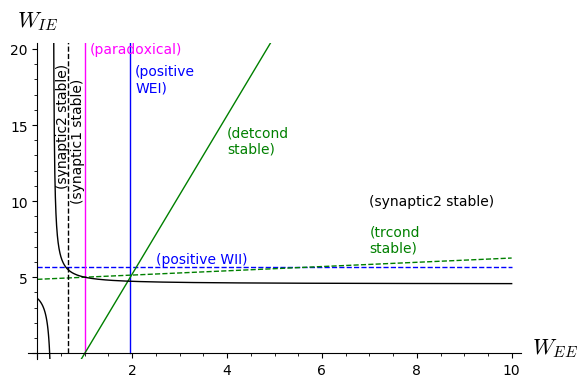

In [148]:
W_EE_max = 10
fig1 = line([[W_EE.subs(positive_WEI_cond_border_pdx),0],[W_EE.subs(positive_WEI_cond_border_pdx),50]],color='blue',linestyle='-',legend_label='positive WEI')
fig2 = line([[0,W_IE.subs(positive_WII_cond_border_pdx)],[W_EE_max,W_IE.subs(positive_WII_cond_border_pdx)]],color='blue',linestyle='--',legend_label='positive WEI')
fig3 = line([[W_EE.subs(paradox_cond_border_pdx),0],[W_EE.subs(paradox_cond_border_pdx),50]],color='magenta',legend_label='paradoxical')
fig4 = plot(W_IE.subs(neural_stable_detcond_v2_border_pdx),(W_EE,0,W_EE_max),ymin=0,color='green',linestyle='-',legend_label='neural detcond')
fig5 = plot(W_IE.subs(neural_stable_trcond_v2_border_pdx),(W_EE,0,W_EE_max),ymin=0,color='green',linestyle='--',legend_label='neural trcond')
fig7 = line([[W_EE.subs(synaptic_stable_cond1_border_pdx),0],[W_EE.subs(synaptic_stable_cond1_border_pdx),50]],color='black',linestyle='--',legend_label='synaptic2 stable')
fig8 = plot(W_IE.subs(synaptic_stable_cond2_border_pdx),(W_EE,0,W_EE_max),detect_poles='no',ymin=0,color='black',linestyle='-',legend_label='synaptic2 stable')
tt1 = text('(positive\nWEI)', (0.1+W_EE.subs(positive_WEI_cond_border_pdx),18),color='blue',horizontal_alignment='left')
tt2 = text('(positive WII)', (2.5,0.5+W_IE.subs(positive_WII_cond_border_pdx)),color='blue',horizontal_alignment='left')
tt3 = text('(paradoxical)', (0.1+W_EE.subs(paradox_cond_border_pdx),20),color='magenta',horizontal_alignment='left')
tt4 = text('(detcond\nstable)', (4,14),color='green',horizontal_alignment='left')
tt5 = text('(trcond\nstable)', (7,7.5),color='green',horizontal_alignment='left')
#tt7a = text('(synaptic1 stable)', (7,2),color='black',horizontal_alignment='left')
tt7b = text('(synaptic2 stable)', (0.4,15),color='black',horizontal_alignment='left',rotation=90)
tt7a = text('(synaptic2 stable)', (7,10),color='black',horizontal_alignment='left')
tt7c = text('(synaptic1 stable)', (0.7,14),color='black',horizontal_alignment='left',rotation=90)
#tt7b = text('(synaptic1 stable)', (1.2,14),color='black',horizontal_alignment='left',rotation=90)
fig = fig1 + fig2 + fig3 + fig4 + fig5 + fig7 +fig8 + tt1 + tt2 + tt3 + tt4 + tt5 + tt7a + tt7b + tt7c
fig.xmin(0)
fig.xmax(W_EE_max)
fig.ymin(0)
fig.ymax(20)
fig.axes_labels(['$W_{EE}$', '$W_{IE}$'])
fig.set_legend_options(loc='upper right')
fig.legend(False)
#fig.save('SS_stability_alphaE=alphaI.pdf')
#fig.save('SS_stability_alphaE>alphaI.pdf')
#fig.save('SS_stability_alphaE>>alphaI.pdf')
#fig.save('SS_stability_alphaE<alphaI.pdf')
#fig.save('SS_stability_alphaE<<alphaI.pdf')
#fig.save('SS_stability_alphaEE=0.02-alphaEI=0.01-alphaI=0.002.pdf')
#fig.save('SS_stability_alphaEE=0.02-alphaEI=0.01-alphaIE=0.0002-alphaII=0.005.pdf')
show(fig)

#### Non-paradoxical conditions

In [171]:
W_EEup = W_EE==5
W_IEup = W_IE==10
#alphas = [alpha_EE==0.02,alpha_EI==0.02,alpha_IE==0.02,alpha_II==0.02] # label: alphaE=alphaI
#alphas = [alpha_EE==0.02,alpha_EI==0.02,alpha_IE==0.002,alpha_II==0.002] # label: alphaE>alphaI
#alphas = [alpha_EE==0.02,alpha_EI==0.02,alpha_IE==0.0002,alpha_II==0.0002] # label: alphaE>>alphaI
alphas = [alpha_EE==0.002,alpha_EI==0.002,alpha_IE==0.02,alpha_II==0.02] # label: alphaE<alphaI
#alphas = [alpha_EE==0.0002,alpha_EI==0.0002,alpha_IE==0.02,alpha_II==0.02] # label: alphaE<<alphaI
#alphas = [alpha_EE==0.02,alpha_EI==0.01,alpha_IE==0.002,alpha_II==0.002] # label: alphaEE=0.02-alphaEI=0.01-alphaI=0.002
#alphas = [alpha_EE==0.02,alpha_EI==0.01,alpha_IE==0.0002,alpha_II==0.005] # label: alphaEE=0.02-alphaEI=0.01-alphaIE=0.0002-alphaII=0.005
upstate_orig = [W_EEup,
                 W_EI==W_EI.subs(synapticFixedPoint_qss_subs_up_orig).subs(values_nonparadoxical).subs(W_EEup),
                 W_IEup,
                 W_II==W_II.subs(synapticFixedPoint_qss_subs_up_orig).subs(values_nonparadoxical).subs(W_IEup)]
upstate_norm = [w_EE==w_EE.subs(weights).subs(parameters).subs(parameters).subs(values_nonparadoxical).subs(upstate_orig),
                 w_EI==w_EI.subs(weights).subs(parameters).subs(parameters).subs(values_nonparadoxical).subs(upstate_orig),
                 w_IE==w_IE.subs(weights).subs(parameters).subs(parameters).subs(values_nonparadoxical).subs(upstate_orig),
                 w_II==w_II.subs(weights).subs(parameters).subs(parameters).subs(values_nonparadoxical).subs(upstate_orig)]
show(upstate_orig)
show(upstate_norm)

[W_EE == 5, W_EI == 1.2999999999999998, W_IE == 10, W_II == (43/28)]

[w_EE == 2.5, w_EI == 1.8199999999999998, w_IE == (100/7), w_II == (43/7)]

In [172]:
probe = [W_EE==5,W_IE==10]
positive_WEI_cond_border_pdx = solve(positive_WEI_cond.lhs()==positive_WEI_cond.rhs(),W_EE)[0].subs(values_nonparadoxical)
positive_WII_cond_border_pdx = solve(positive_WII_cond.lhs()==positive_WII_cond.rhs(),W_IE)[0].subs(values_nonparadoxical)
paradox_cond_border_pdx = solve(paradox_cond.left()==paradox_cond.right(),W_EE,W_IE)[0][0].subs(values_nonparadoxical)
neural_stable_detcond_v2_border_pdx = solve(neural_stable_detcond_v2.lhs()==neural_stable_detcond_v2.rhs(),W_IE)[0].subs(values_nonparadoxical)
neural_stable_trcond_v2_border_pdx = solve(neural_stable_trcond_v2.lhs()==neural_stable_trcond_v2.rhs(),W_IE)[0].subs(values_nonparadoxical)
synaptic_stable_cond1_border_pdx = solve(synaptic_stable_cond1.lhs()==synaptic_stable_cond1.rhs(),W_EE)[0].subs(values_nonparadoxical).subs(alphas)
synaptic_stable_cond2_border_pdx = solve(synaptic_stable_cond2.lhs()==synaptic_stable_cond2.rhs(),W_IE)[0].subs(values_nonparadoxical).subs(alphas)
up_exist_cond_2_v2_border_pdx = solve(up_exist_cond_2_v2.lhs()==up_exist_cond_2_v2.rhs(),W_IE)[0].subs(values_nonparadoxical)
print("PARADOXICAL CONDITIONS")
print("positive_WEI_cond:")
print("     ",positive_WEI_cond)
print("      border: ",positive_WEI_cond_border_pdx)
print("      probe: ",bool(positive_WEI_cond.subs(values_nonparadoxical).subs(probe)))
print("positive_WII_cond:")
print("     ",positive_WII_cond)
print("      border: ",positive_WII_cond_border_pdx)
print("      probe: ",bool(positive_WII_cond.subs(values_nonparadoxical).subs(probe)))
print("paradox_cond:")
print("     ",paradox_cond)
print("      border: ",paradox_cond_border_pdx)
print("      probe: ",bool(paradox_cond.subs(values_nonparadoxical).subs(probe)))
print("neural_stable_detcond_v2:")
print("     ",neural_stable_detcond_v2)
print("      border: ",neural_stable_detcond_v2_border_pdx)
print("      probe: ",bool(neural_stable_detcond_v2.subs(values_nonparadoxical).subs(probe)))
print("neural_stable_trcond_v2:")
print("     ",neural_stable_trcond_v2)
print("      border: ",neural_stable_trcond_v2_border_pdx)
print("      probe: ",bool(neural_stable_trcond_v2.subs(values_nonparadoxical).subs(probe)))
print("synaptic_stable_cond1:")
print("     ",synaptic_stable_cond1)
print("      border: ",synaptic_stable_cond1_border_pdx)
print("      probe: ",bool(synaptic_stable_cond1.subs(values_nonparadoxical).subs(alphas).subs(probe)))
print("synaptic_stable_cond2:")
print("     ",synaptic_stable_cond2)
print("      border: ",synaptic_stable_cond2_border_pdx)
print("      probe: ",bool(synaptic_stable_cond2.subs(values_nonparadoxical).subs(alphas).subs(probe)))
print("up_exist_cond_2_v2:")
print("     ",up_exist_cond_2_v2)
print("      border: ",up_exist_cond_2_v2_border_pdx)
print("      probe: ",bool(up_exist_cond_2_v2.subs(values_nonparadoxical).subs(probe)))

PARADOXICAL CONDITIONS
positive_WEI_cond:
      E_set*W_EE*g_E + I_ext*g_E - Theta_E*g_E - E_set > 0
      border:  W_EE == 1.36
      probe:  True
positive_WII_cond:
      E_set*W_IE*g_I - Theta_I*g_I - I_set > 0
      border:  W_IE == (57/10)
      probe:  True
paradox_cond:
      W_EE*g_E - 1 > 0
      border:  W_EE == 2.0
      probe:  True
neural_stable_detcond_v2:
      Theta_I*W_EE*g_E + I_ext*W_IE*g_E - Theta_E*W_IE*g_E - Theta_I > 0
      border:  W_IE == -7.8125*W_EE + 15.625
      probe:  True
neural_stable_trcond_v2:
      E_set*W_IE*g_I*tau_E - I_set*W_EE*g_E*tau_I - Theta_I*g_I*tau_E + I_set*tau_I > 0
      border:  W_IE == 0.07*W_EE + 243/50
      probe:  True
synaptic_stable_cond1:
      E_set*W_EE*alpha_EE*g_E + E_set*W_EE*alpha_EI*g_E + I_ext*alpha_EI*g_E - Theta_E*alpha_EI*g_E - E_set*alpha_EI > 0
      border:  W_EE == 0.680000000000000
      probe:  True
synaptic_stable_cond2:
      -E_set^2*W_EE*W_IE*alpha_EE*g_E*g_I - E_set^2*W_EE*W_IE*alpha_EI*g_E*g_I + E_set*I_

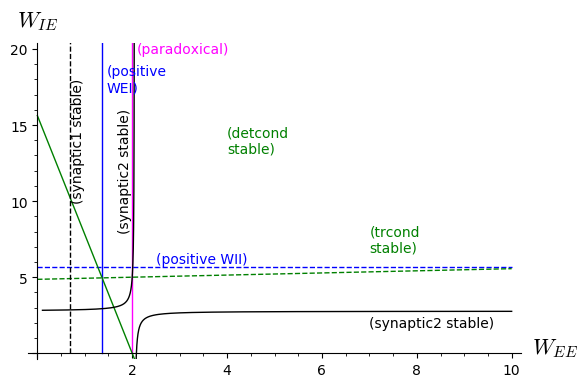

In [179]:
W_EE_max = 10
fig1 = line([[W_EE.subs(positive_WEI_cond_border_pdx),0],[W_EE.subs(positive_WEI_cond_border_pdx),50]],color='blue',linestyle='-',legend_label='positive WEI')
fig2 = line([[0,W_IE.subs(positive_WII_cond_border_pdx)],[W_EE_max,W_IE.subs(positive_WII_cond_border_pdx)]],color='blue',linestyle='--',legend_label='positive WEI')
fig3 = line([[W_EE.subs(paradox_cond_border_pdx),0],[W_EE.subs(paradox_cond_border_pdx),50]],color='magenta',legend_label='paradoxical')
fig4 = plot(W_IE.subs(neural_stable_detcond_v2_border_pdx),(W_EE,0,W_EE_max),ymin=0,color='green',linestyle='-',legend_label='neural detcond')
fig5 = plot(W_IE.subs(neural_stable_trcond_v2_border_pdx),(W_EE,0,W_EE_max),ymin=0,color='green',linestyle='--',legend_label='neural trcond')
fig7 = line([[W_EE.subs(synaptic_stable_cond1_border_pdx),0],[W_EE.subs(synaptic_stable_cond1_border_pdx),50]],color='black',linestyle='--',legend_label='synaptic2 stable')
fig8 = plot(W_IE.subs(synaptic_stable_cond2_border_pdx),(W_EE,0,W_EE_max),detect_poles='no',ymin=0,color='black',linestyle='-',legend_label='synaptic2 stable')
tt1 = text('(positive\nWEI)', (0.1+W_EE.subs(positive_WEI_cond_border_pdx),18),color='blue',horizontal_alignment='left')
tt2 = text('(positive WII)', (2.5,0.5+W_IE.subs(positive_WII_cond_border_pdx)),color='blue',horizontal_alignment='left')
tt3 = text('(paradoxical)', (0.1+W_EE.subs(paradox_cond_border_pdx),20),color='magenta',horizontal_alignment='left')
tt4 = text('(detcond\nstable)', (4,14),color='green',horizontal_alignment='left')
tt5 = text('(trcond\nstable)', (7,7.5),color='green',horizontal_alignment='left')
#tt7a = text('(synaptic1 stable)', (7,2),color='black',horizontal_alignment='left')
tt7b = text('(synaptic2 stable)', (1.7,12),color='black',horizontal_alignment='left',rotation=90)
tt7a = text('(synaptic2 stable)', (7,2),color='black',horizontal_alignment='left')
tt7c = text('(synaptic1 stable)', (0.7,14),color='black',horizontal_alignment='left',rotation=90)
#tt7b = text('(synaptic1 stable)', (1.2,14),color='black',horizontal_alignment='left',rotation=90)
fig = fig1 + fig2 + fig3 + fig4 + fig5 + fig7 +fig8 + tt1 + tt2 + tt3 + tt4 + tt5 + tt7a + tt7b + tt7c
fig.xmin(0)
fig.xmax(W_EE_max)
fig.ymin(0)
fig.ymax(20)
fig.axes_labels(['$W_{EE}$', '$W_{IE}$'])
fig.set_legend_options(loc='upper right')
fig.legend(False)
#fig.save('SS_stability_nonparadoxical_alphaE=alphaI.pdf')
#fig.save('SS_stability_nonparadoxical_alphaE>alphaI.pdf')
#fig.save('SS_stability_nonparadoxical_alphaE>>alphaI.pdf')
#fig.save('SS_stability_nonparadoxical_alphaE<alphaI.pdf')
#fig.save('SS_stability_nonparadoxical_alphaE<<alphaI.pdf')
#fig.save('SS_stability_nonparadoxical_alphaEE=0.02-alphaEI=0.01-alphaI=0.002.pdf')
#fig.save('SS_stability_nonparadoxical_alphaEE=0.02-alphaEI=0.01-alphaIE=0.0002-alphaII=0.005.pdf')
show(fig)